# MSBD566 – Midterm Project: Breast Cancer Dimensionality Reduction and Neural Network

**Author:** James Walton  
**Course:** MSBD566 – Predictive Modeling and Analytics  
**Date:** 11-30-2025  

---

## Project Description
This project focuses on classifying breast cancer tumors as benign or malignant using diagnostic measurements collected from fine-needle aspirate (FNA) samples of breast tissue. Building on the previous analysis, which used a Random Forest Classifier, this extended study incorporates two additional approaches: a dimensionality reduction step using Principal Component Analysis (PCA) and a neural network model. The dataset used is the Breast Cancer Wisconsin (Diagnostic) dataset, which contains 30 numerical features describing the physical characteristics of cell nuclei captured from digitized medical images.

The purpose of this expanded analysis is to compare how different modeling strategies handle the same diagnostic information and to evaluate whether reducing the number of features affects classification performance. Understanding how well these methods identify tumors that are likely to be malignant contributes to early detection efforts and may support clinical decision-making by highlighting consistent patterns in the underlying diagnostic measurements.

---

## Data Description
**Dataset:** Breast Cancer Wisconsin (Diagnostic)  
**Source:** UCI Machine Learning Repository  
**Link:** [https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic)  

The Breast Cancer Wisconsin (Diagnostic) dataset contains records from fine-needle aspirate (FNA) samples of breast tissue analyzed at the University of Wisconsin Hospital. Each sample is described by 30 numeric measurements that characterize the size, texture, and shape of cell nuclei observed under the microscope.
The data also include an identifying case number and a categorical diagnosis, benign or malignant, as determined by histopathologic review. The variables capture both central tendency (e.g., mean radius, mean texture) and variation (e.g., standard error, worst values) for each morphological feature.

The target variable is **Diagnosis**:  
- `M` = Malignant  
- `B` = Benign  

---


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"

columns = [
    'id','diagnosis',
    'radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean',
    'concavity_mean','concave_points_mean','symmetry_mean','fractal_dimension_mean',
    'radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se',
    'concavity_se','concave_points_se','symmetry_se','fractal_dimension_se',
    'radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst',
    'compactness_worst','concavity_worst','concave_points_worst','symmetry_worst','fractal_dimension_worst'
]

df = pd.read_csv(url, header=None, names=columns)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


/var/folders/cc/fj50fdlx3970nc89xt_9hmlr0000gn/T/ipykernel_30683/2966586525.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis', data=df, palette='Set2')


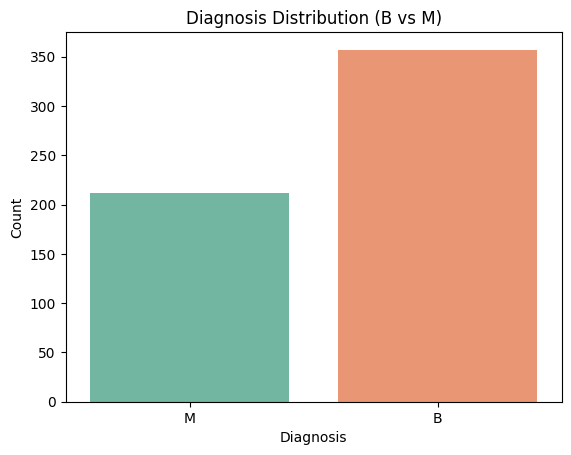

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.00000,869218.00000,906024.00000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.98100,11.70000,13.37000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.71000,16.17000,18.84000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.79000,75.17000,86.24000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.50000,420.30000,551.10000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.05263,0.08637,0.09587,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.01938,0.06492,0.09263,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.00000,0.02956,0.06154,1.307000e-01,4.268000e-01
concave_points_mean,569.0,4.891915e-02,3.880284e-02,0.00000,0.02031,0.03350,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.10600,0.16190,0.17920,1.957000e-01,3.040000e-01


In [3]:
# Class distribution
sns.countplot(x='diagnosis', data=df, palette='Set2')
plt.title('Diagnosis Distribution (B vs M)')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

# Summary statistics
df.describe().T.head(10)

In [4]:
# Data Preprocessing

# Encode diagnosis: M = 1 (Malignant), B = 0 (Benign)
df['target'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Select features and target
X = df.drop(columns=['id', 'diagnosis', 'target'])
y = df['target']

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training set:", X_train.shape)
print("Test set:", X_test.shape)

Training set: (455, 30)
Test set: (114, 30)


In [5]:
# Random Forest Classification

rf_model = RandomForestClassifier(
    n_estimators=300,
    random_state=RANDOM_STATE,
    n_jobs=-1
)

rf_model.fit(X_train_scaled, y_train)
y_pred = rf_model.predict(X_test_scaled)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Benign','Malignant']))

Accuracy: 0.9737

Classification Report:
               precision    recall  f1-score   support

      Benign       0.96      1.00      0.98        72
   Malignant       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



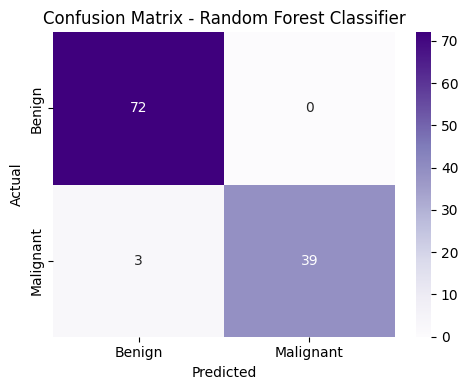

In [6]:
# Confusion Matrix Visualization

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=['Benign','Malignant'], yticklabels=['Benign','Malignant'])
plt.title('Confusion Matrix - Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

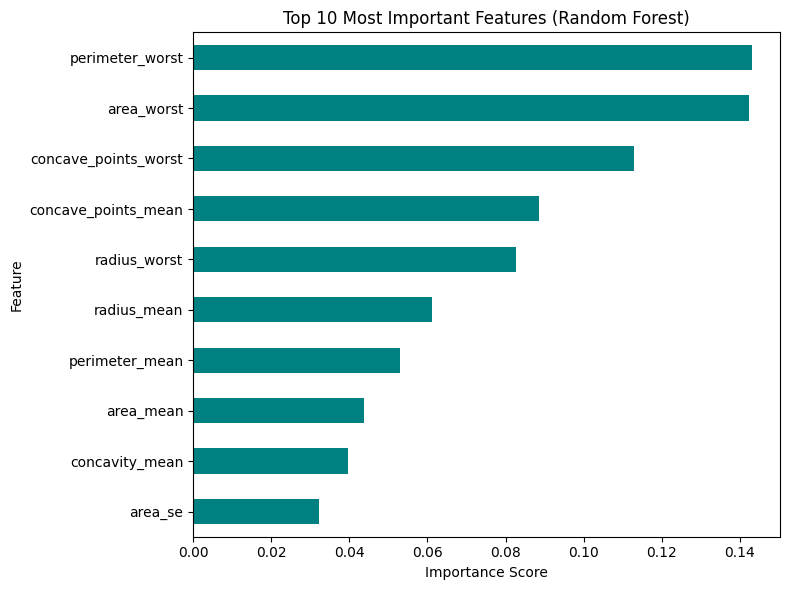

In [7]:
# Create a pandas Series of feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)

# Select the top 10 most important features
top_features = feature_importances.nlargest(10)

# Plot the results
plt.figure(figsize=(8,6))
top_features.sort_values().plot(kind='barh', color='teal')
plt.title('Top 10 Most Important Features (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

---
## Evaluation

- The **Random Forest Classifier** achieved high accuracy in distinguishing malignant from benign tumors.  
- The confusion matrix shows the number of correct and incorrect classifications.  
- Early and accurate classification assists healthcare professionals in prioritizing patients for biopsy or further imaging.


In [8]:
# Dimensionality Reduction with PCA
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier

In [9]:
# Fit PCA on the scaled training data(keep enough components to explain ~95% of the variance)
pca = PCA(n_components=0.95)
pca.fit(X_train_scaled)

X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("Number of PCA components retained:", pca.n_components_)
print("Explained variance ratio per component:")
print(pca.explained_variance_ratio_)
print("Total variance explained:", pca.explained_variance_ratio_.sum())

Number of PCA components retained: 10
Explained variance ratio per component:
[0.44593522 0.18545255 0.09584641 0.06593768 0.05622286 0.03988488
 0.02214493 0.01614006 0.01284789 0.01165661]
Total variance explained: 0.9520691014391004


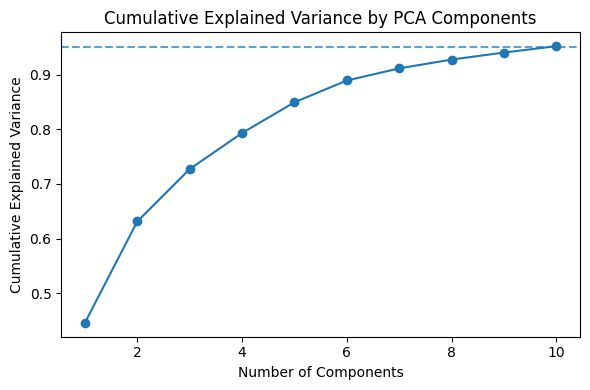

In [10]:
# Plot the explained variance
plt.figure(figsize=(6,4))
cum_var = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(cum_var) + 1), cum_var, marker='o')
plt.axhline(y=0.95, linestyle='--', alpha=0.7)
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.tight_layout()
plt.show()

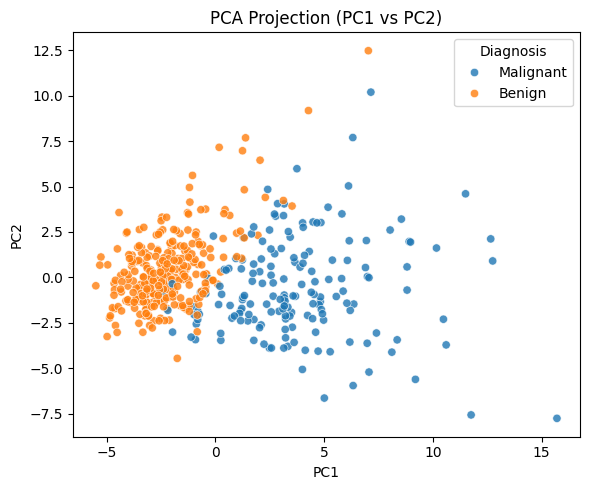

In [11]:
# 2D scatter plot of the first two principal components
pca_df = pd.DataFrame({
    'PC1': X_train_pca[:, 0],
    'PC2': X_train_pca[:, 1],
    'Diagnosis': y_train.replace({0: 'Benign', 1: 'Malignant'})
})

plt.figure(figsize=(6,5))
sns.scatterplot(
    data=pca_df,
    x='PC1',
    y='PC2',
    hue='Diagnosis',
    alpha=0.8
)
plt.title('PCA Projection (PC1 vs PC2)')
plt.tight_layout()
plt.show()



In [12]:
# Random Forest on PCA-reduced data (this show's the impact of dimensionality reduction on performance)

rf_pca_model = RandomForestClassifier(
    n_estimators=300,
    random_state=RANDOM_STATE,
    n_jobs=-1
)

rf_pca_model.fit(X_train_pca, y_train)
y_pred_pca = rf_pca_model.predict(X_test_pca)

print("Random Forest on PCA-Reduced Data")
print(f"Accuracy: {accuracy_score(y_test, y_pred_pca):.4f}")
print("\nClassification Report:\n",
      classification_report(y_test, y_pred_pca, target_names=['Benign','Malignant']))

Random Forest on PCA-Reduced Data
Accuracy: 0.9474

Classification Report:
               precision    recall  f1-score   support

      Benign       0.95      0.97      0.96        72
   Malignant       0.95      0.90      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [13]:
# Neural Network (MLP) on Original Scaled Features

mlp_model = MLPClassifier(
    hidden_layer_sizes=(16, 8),
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=RANDOM_STATE
)

mlp_model.fit(X_train_scaled, y_train)
y_pred_nn = mlp_model.predict(X_test_scaled)


In [14]:
# Evaluation for Neural Network
nn_accuracy = accuracy_score(y_test, y_pred_nn)
print("Neural Network (MLP) Results")
print(f"Accuracy: {nn_accuracy:.4f}")
print("\nClassification Report:\n",
      classification_report(y_test, y_pred_nn, target_names=['Benign','Malignant']))

Neural Network (MLP) Results
Accuracy: 0.9912

Classification Report:
               precision    recall  f1-score   support

      Benign       0.99      1.00      0.99        72
   Malignant       1.00      0.98      0.99        42

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



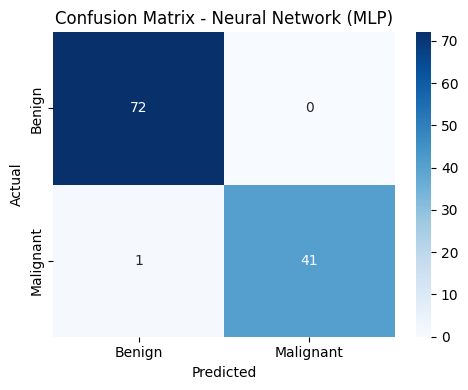

In [15]:
# Confusion Matrix for Neural Network
cm_nn = confusion_matrix(y_test, y_pred_nn)

plt.figure(figsize=(5,4))
sns.heatmap(
    cm_nn,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Benign','Malignant'],
    yticklabels=['Benign','Malignant']
)
plt.title('Confusion Matrix - Neural Network (MLP)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()